In [54]:
import pandas as pd
import numpy as np
import os
from env import get_db_url
import wrangle
import seaborn as sns
from statistics import stdev
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split


In [55]:
df = wrangle.get_zillow_data()

In [56]:
df.head()

,Number_of_Bedrooms,Number_of_Bathrooms,Square_Footage,Tax_Appraised_Value,Year_Built,Tax_Assessed,County_Code
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [57]:
df = wrangle.prepare_zillow_data(df)

In [58]:
df.head()

,Number_of_Bedrooms,Number_of_Bathrooms,Square_Footage,Tax_Appraised_Value,Year_Built,Tax_Assessed,County_Code
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
18,3,1.0,1244,169471,1950,2532.88,6037
19,3,2.0,1300,233266,1950,3110.99,6037


array([[<AxesSubplot:title={'center':'Number_of_Bedrooms'}>,
        <AxesSubplot:title={'center':'Number_of_Bathrooms'}>,
        <AxesSubplot:title={'center':'Square_Footage'}>],
       [<AxesSubplot:title={'center':'Tax_Appraised_Value'}>,
        <AxesSubplot:title={'center':'Year_Built'}>,
        <AxesSubplot:title={'center':'Tax_Assessed'}>],
       [<AxesSubplot:title={'center':'County_Code'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

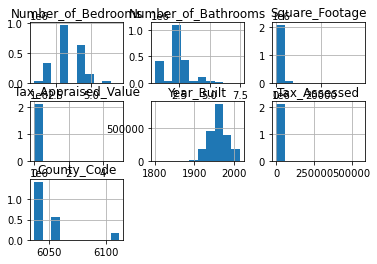

In [7]:
df.hist()

In [8]:
def split_zillow_data(df):
    ''' This function splits the cleaned dataframe into train, validate, and test 
    datasets and statrifies based on the target - Tax_Appraised_Value.'''

    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)
    
    return train, validate, test

In [10]:
train, validate, test = split_zillow_data(df)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1193167 entries, 1195524 to 44507
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Number_of_Bedrooms   1193167 non-null  int64  
 1   Number_of_Bathrooms  1193167 non-null  float64
 2   Square_Footage       1193167 non-null  int64  
 3   Tax_Appraised_Value  1193167 non-null  int64  
 4   Year_Built           1193167 non-null  int64  
 5   Tax_Assessed         1193167 non-null  float64
 6   County_Code          1193167 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 72.8 MB


### Application and visualization of scalers

In [12]:
columns_to_scale = ['Number_of_Bedrooms','Number_of_Bathrooms', 'Square_Footage']

In [17]:
scaler = sklearn.preprocessing.MinMaxScaler()
train_scaled = train.copy()
train_scaled[columns_to_scale] = scaler.fit_transform(train_scaled[columns_to_scale])

In [19]:
train_scaled.head()

,Number_of_Bedrooms,Number_of_Bathrooms,Square_Footage,Tax_Appraised_Value,Year_Built,Tax_Assessed,County_Code
1195524,0.500000,0.214286,0.046358,133880,1975,1629.80,6111
1028319,0.666667,0.500000,0.095313,1077474,1989,12024.89,6037
613526,0.500000,0.357143,0.059507,270000,2004,4160.24,6037
1347597,0.333333,0.214286,0.035726,175032,1952,2027.48,6037
237054,0.166667,0.214286,0.046947,615000,1976,7274.60,6111


Text(0.5, 1.0, 'Scaled')

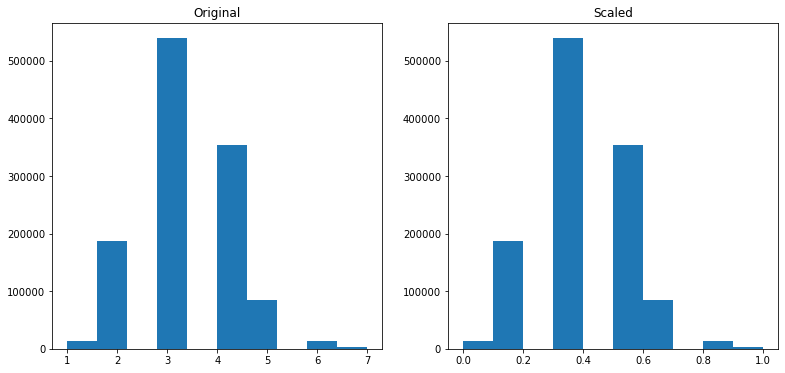

In [21]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.Number_of_Bedrooms)
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled.Number_of_Bedrooms)
plt.title('Scaled')

In [22]:
scaler = sklearn.preprocessing.StandardScaler()
train_scaled = train.copy()
train_scaled[columns_to_scale] = scaler.fit_transform(train_scaled[columns_to_scale])

Text(0.5, 1.0, 'Scaled')

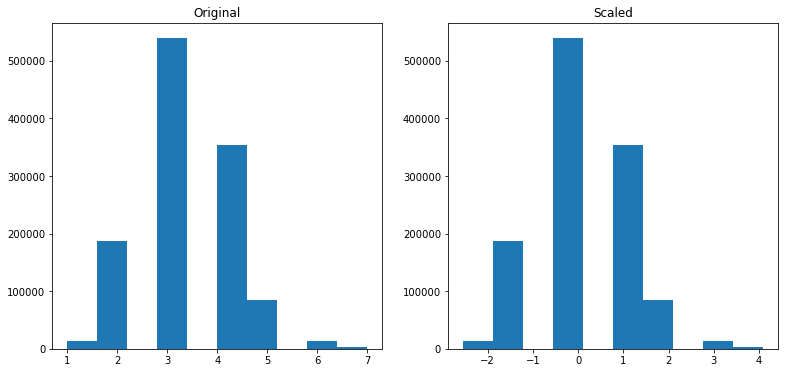

In [23]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.Number_of_Bedrooms)
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled.Number_of_Bedrooms)
plt.title('Scaled')

In [26]:
scaler = sklearn.preprocessing.RobustScaler()
train_scaled = train.copy()
train_scaled[columns_to_scale] = scaler.fit_transform(train_scaled[columns_to_scale])

Text(0.5, 1.0, 'Scaled')

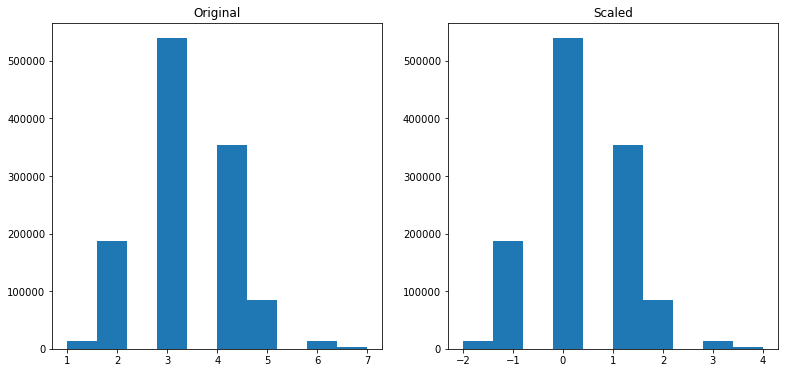

In [27]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.Number_of_Bedrooms)
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled.Number_of_Bedrooms)
plt.title('Scaled')

In [28]:
# instructor provided code duting review
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
#    return fig, axs

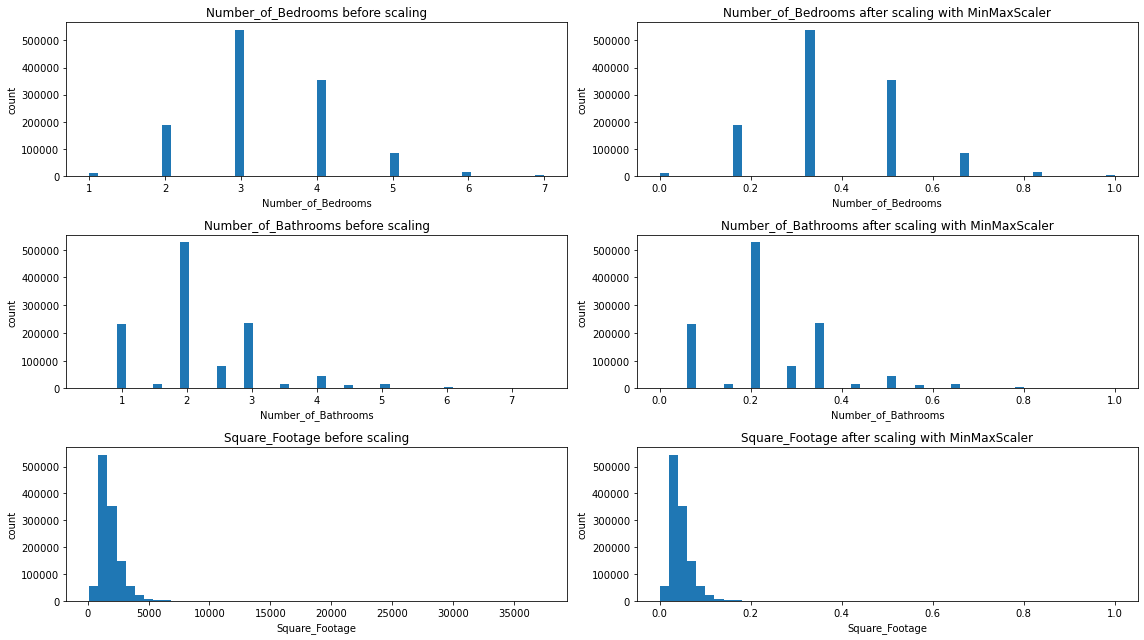

In [30]:
# MinMaxScaler Applied
visualize_scaler(scaler=sklearn.preprocessing.MinMaxScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

### Inverse

In [31]:
scaler = sklearn.preprocessing.RobustScaler()
original_data = train[['Number_of_Bathrooms']]
scaled_data = scaler.fit_transform(original_data)

In [32]:
original_data[:3]

,Number_of_Bathrooms
1195524,2.0
1028319,4.0
613526,3.0


In [33]:
scaled_data[:3]

array([[0.],
       [2.],
       [1.]])

In [34]:
scaler.inverse_transform(scaled_data)[:3]

array([[2.],
       [4.],
       [3.]])

### QuantileTransformer

In [49]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
train_scaled = train.copy()
train_scaled[columns_to_scale] = scaler.fit_transform(train_scaled[columns_to_scale])

Text(0.5, 1.0, 'Scaled')

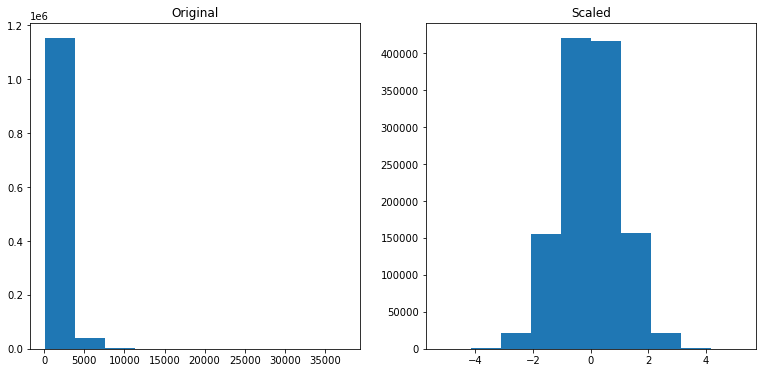

In [51]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.Square_Footage)
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled.Square_Footage)
plt.title('Scaled')

In [52]:
scaler = sklearn.preprocessing.QuantileTransformer()
train_scaled = train.copy()
train_scaled[columns_to_scale] = scaler.fit_transform(train_scaled[columns_to_scale])

Text(0.5, 1.0, 'Scaled')

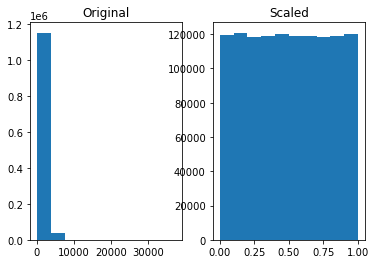

In [53]:
plt.subplot(121)
plt.hist(train.Square_Footage)
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled.Square_Footage)
plt.title('Scaled')